<a href="https://colab.research.google.com/github/blazaropinto/DS-2021---ENVIRONMENT-WOMEN-IN-TECH/blob/main/WIP/Spaces%20for%20people%20Market%20Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Import pertinent libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress, ttest_ind

# Import raw data and wrangled data to be used

In [ ]:
df = pd.read_excel('../WEEK_COMMENCING_210621/2106-Market_Research_Raw_Data_cleaned for analysis_cleaned_Jay.xlsx', 
                   sheet_name='Market Research Raw Data', header=1)
df.head()

,Question Weight,What is your age?,What is your gender?,"space for walking/cycling, restricting parking/closing streets near schools",New protected cycle lanes on main roads,Space in shopping streets for walking and/or cycling,Space in city centre for walking and/or cycling,"Connecting existing walking/cycling routes used for leisure, by closing some roads to cars and/or providing protected space for walking and cycling on roads.","New signed ‘quiet connections’ for day to day cycling, with road closures to reduce traffic.",What would you say are the most important disadvantages of retaining ‘Spaces for People’ measures in place? Please select up to 5 answers,...,Transport used before pandemic.2,Transport used before pandemic.3,Transport used before pandemic.4,Transport used before pandemic.5,Transport used before pandemic.6,Transport used before pandemic.7,Transport used before pandemic.8,Transport used before pandemic.9,Area,how many cars or vans (own or company cars/vans) are available to members of your household?
0,1.05932,25 – 34,Female,Support,Support,Support,Support,Support,Support,NaN,...,NaN,NaN,Walk,NaN,NaN,NaN,NaN,None,North,1
1,0.74047,45 – 54,Male,Support,Support,Support,Strongly support,Support,Support,Inconvenience to car users caused by roads clo...,...,Bus,NaN,Walk,NaN,NaN,NaN,NaN,NaN,East,None
2,0.74047,45 – 54,Male,Strongly support,Strongly support,Strongly support,Strongly support,Strongly support,Strongly support,Inconvenience to car users caused by roads clo...,...,Bus,NaN,Walk,NaN,Cycle,NaN,NaN,NaN,North,1
3,1.08698,35 – 44,Male,Strongly support,Strongly support,Strongly support,Strongly support,Strongly support,Strongly support,NaN,...,Bus,NaN,Walk,NaN,Cycle,NaN,NaN,NaN,South,None
4,1.01980,65 – 74,Male,Support,Strongly support,Support,Neutral,Oppose,Neutral,Inconvenience to car users caused by roads clo...,...,NaN,NaN,Walk,NaN,NaN,NaN,NaN,NaN,South,1


In [ ]:
df.columns

Index(['Question Weight', 'What is your age?', 'What is your gender?',
       'space for walking/cycling, restricting parking/closing streets near schools',
       'New protected cycle lanes on main roads',
       'Space in shopping streets for walking and/or cycling',
       'Space in city centre for walking and/or cycling',
       'Connecting existing walking/cycling routes used for leisure, by closing some roads to cars and/or providing protected space for walking and cycling on roads.',
       'New signed ‘quiet connections’ for day to day cycling, with road closures to reduce traffic.',
       'What would you say are the most important disadvantages of retaining ‘Spaces for People’ measures in place?  Please select up to 5 answers',
       'What would you say are the most important disadvantages of retaining ‘Spaces for People’ measures in place?  Please select up to 5 answers.1',
       'What would you say are the most important disadvantages of retaining ‘Spaces for People’ meas

In [ ]:
factors = ['space for walking/cycling, restricting parking/closing streets near schools', 
              'Space in city centre for walking and/or cycling', 
              'New signed ‘quiet connections’ for day to day cycling, with road closures to reduce traffic.',
              'Most often', '2nd most often', '3rd most often',
              'Most often.1', '2nd most often.1', '3rd most often.1', 
             'how many cars or vans (own or company cars/vans) are available to members of your household?']

opinions = ['space for walking/cycling, restricting parking/closing streets near schools', 
              'Space in city centre for walking and/or cycling', 
              'New signed ‘quiet connections’ for day to day cycling, with road closures to reduce traffic.']

elements = ['Area', 'What is your age?', 'What is your gender?']

In [ ]:
normalised_df = df[elements + factors]
normalised_df.head()

,Area,What is your age?,What is your gender?,"space for walking/cycling, restricting parking/closing streets near schools",Space in city centre for walking and/or cycling,"New signed ‘quiet connections’ for day to day cycling, with road closures to reduce traffic.",Most often,2nd most often,3rd most often,Most often.1,2nd most often.1,3rd most often.1,how many cars or vans (own or company cars/vans) are available to members of your household?
0,North,25 – 34,Female,Support,Support,Support,Walk,Car,None,Walk,Car,None,1
1,East,45 – 54,Male,Support,Strongly support,Support,Walk,Cycle,Bus,Walk,Bus,Taxi/Private hire car,None
2,North,45 – 54,Male,Strongly support,Strongly support,Strongly support,Cycle,Walk,Bus,Walk,Bus,Cycle,1
3,South,35 – 44,Male,Strongly support,Strongly support,Strongly support,Walk,Bus,Cycle,Bus,Cycle,Walk,None
4,South,65 – 74,Male,Support,Neutral,Neutral,Car,Taxi/Private hire car,Walk,Car,Taxi/Private hire car,Walk,1


### Normalize columns (for factors to consider) into integers

to allow its use for easily calculating correlations

> assuming 2 for '2 or more' private vehicles available in the household

In [ ]:
for col in opinions:
    def normalise_opinions(df):
        if df[col] == 'Strongly support':
            return 5
        elif df[col] == 'Support':
            return 4
        elif df[col] == 'Neutral':
            return 3
        elif df[col] == 'Strongly oppose':
            return 2
        elif df[col] == 'Oppose':
            return 1
        
    normalised_df[col] = normalised_df.apply(normalise_opinions, axis=1)
    
def normalise_privatevehicle(df):
    if df['how many cars or vans (own or company cars/vans) are available to members of your household?'] == 'None':
        return 0
    elif (df['how many cars or vans (own or company cars/vans) are available to members of your household?'] == 1) or \
    (df['how many cars or vans (own or company cars/vans) are available to members of your household?'] == '1'):
        return 1
    elif df['how many cars or vans (own or company cars/vans) are available to members of your household?'] == '2 or more':
        return 2
    
normalised_df['how many cars or vans (own or company cars/vans) are available to members of your household?'] = normalised_df.apply(normalise_privatevehicle, axis=1)

normalised_df.head(50)

<ipython-input-6-0a0c4bedda06>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normalised_df[col] = normalised_df.apply(normalise_opinions, axis=1)
<ipython-input-6-0a0c4bedda06>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normalised_df['how many cars or vans (own or company cars/vans) are available to members of your household?'] = normalised_df.apply(normalise_privatevehicle, axis=1)


,Area,What is your age?,What is your gender?,"space for walking/cycling, restricting parking/closing streets near schools",Space in city centre for walking and/or cycling,"New signed ‘quiet connections’ for day to day cycling, with road closures to reduce traffic.",Most often,2nd most often,3rd most often,Most often.1,2nd most often.1,3rd most often.1,how many cars or vans (own or company cars/vans) are available to members of your household?
0,North,25 – 34,Female,4.0,4.0,4.0,Walk,Car,None,Walk,Car,None,1.0
1,East,45 – 54,Male,4.0,5.0,4.0,Walk,Cycle,Bus,Walk,Bus,Taxi/Private hire car,0.0
2,North,45 – 54,Male,5.0,5.0,5.0,Cycle,Walk,Bus,Walk,Bus,Cycle,1.0
3,South,35 – 44,Male,5.0,5.0,5.0,Walk,Bus,Cycle,Bus,Cycle,Walk,0.0
4,South,65 – 74,Male,4.0,3.0,3.0,Car,Taxi/Private hire car,Walk,Car,Taxi/Private hire car,Walk,1.0
5,East,55 – 64,Female,4.0,1.0,2.0,Bus,Car,Walk,Bus,Car,Walk,1.0
6,North,55 – 64,Male,1.0,1.0,2.0,Car,Cycle,Bus,Bus,Car,Cycle,1.0
7,North,35 – 44,Male,2.0,1.0,2.0,Bus,Car,Walk,Car,Bus,Walk,1.0
8,West,45 – 54,Male,5.0,5.0,4.0,Walk,Cycle,Car,Walk,Cycle,Bus,1.0
9,North,55 – 64,Male,3.0,4.0,4.0,Bus,Walk,None,Bus,Walk,None,0.0


In [ ]:
normalised_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 13 columns):
 #   Column                                                                                        Non-Null Count  Dtype  
---  ------                                                                                        --------------  -----  
 0   Area                                                                                          583 non-null    object 
 1   What is your age?                                                                             583 non-null    object 
 2   What is your gender?                                                                          585 non-null    object 
 3   space for walking/cycling, restricting parking/closing streets near schools                   577 non-null    float64
 4   Space in city centre for walking and/or cycling                                               582 non-null    float64
 5   New signed ‘quiet connections

* All columns have null values, which wouldn't allow easy calculation of correlations. 
Drop row containing missing values in the pertinent columns

In [ ]:
norm_df = normalised_df.dropna(subset=opinions)
norm_df = norm_df.dropna(subset=['how many cars or vans (own or company cars/vans) are available to members of your household?'])
norm_df.head()

,Area,What is your age?,What is your gender?,"space for walking/cycling, restricting parking/closing streets near schools",Space in city centre for walking and/or cycling,"New signed ‘quiet connections’ for day to day cycling, with road closures to reduce traffic.",Most often,2nd most often,3rd most often,Most often.1,2nd most often.1,3rd most often.1,how many cars or vans (own or company cars/vans) are available to members of your household?
0,North,25 – 34,Female,4.0,4.0,4.0,Walk,Car,None,Walk,Car,None,1.0
1,East,45 – 54,Male,4.0,5.0,4.0,Walk,Cycle,Bus,Walk,Bus,Taxi/Private hire car,0.0
2,North,45 – 54,Male,5.0,5.0,5.0,Cycle,Walk,Bus,Walk,Bus,Cycle,1.0
3,South,35 – 44,Male,5.0,5.0,5.0,Walk,Bus,Cycle,Bus,Cycle,Walk,0.0
4,South,65 – 74,Male,4.0,3.0,3.0,Car,Taxi/Private hire car,Walk,Car,Taxi/Private hire car,Walk,1.0


In [ ]:
norm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 546 entries, 0 to 582
Data columns (total 13 columns):
 #   Column                                                                                        Non-Null Count  Dtype  
---  ------                                                                                        --------------  -----  
 0   Area                                                                                          546 non-null    object 
 1   What is your age?                                                                             546 non-null    object 
 2   What is your gender?                                                                          546 non-null    object 
 3   space for walking/cycling, restricting parking/closing streets near schools                   546 non-null    float64
 4   Space in city centre for walking and/or cycling                                               546 non-null    float64
 5   New signed ‘quiet connections

# Analyze several parameters per area, gender and age

* Opinion on:
    * space for walking/cycling, restricting parking/closing streets near schools
    * Space in city centre for walking and/or cycling
    * New signed ‘quiet connections’ for day to day cycling, with road closures to reduce traffic.
* transport used during pandemic
    * Most often
    * 2nd most often
    * 3rd most often
* transport used during pandemic
    * Most often
    * 2nd most often
    * 3rd most often
* how many cars or vans (own or company cars/vans) are available to members of your household?

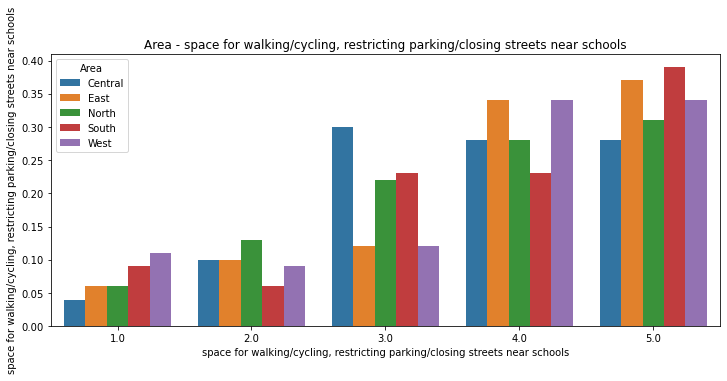

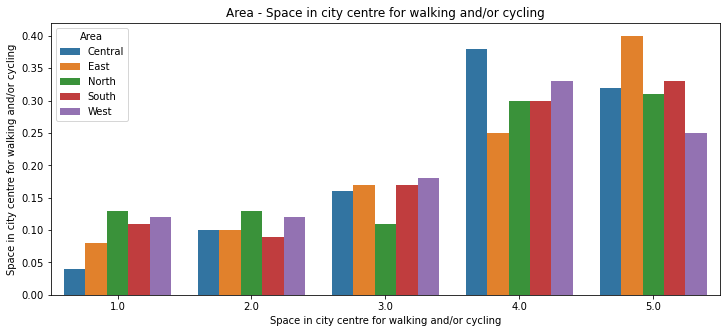

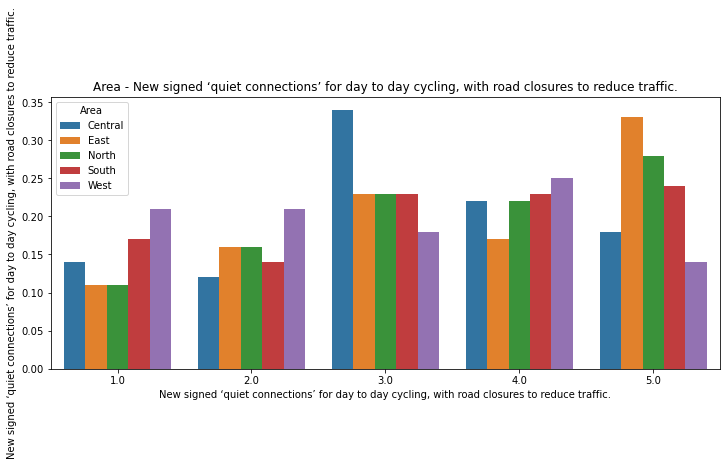

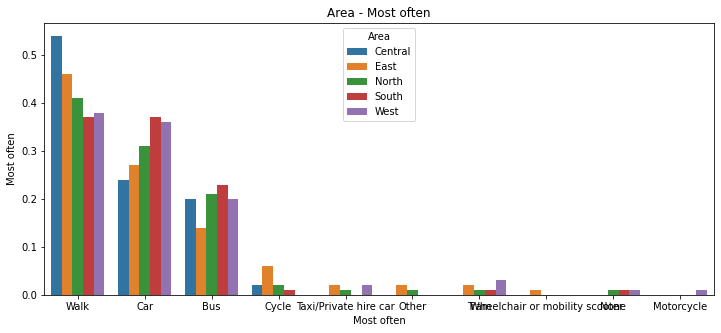

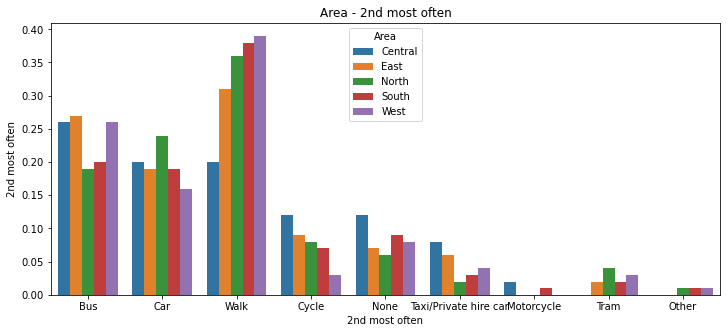

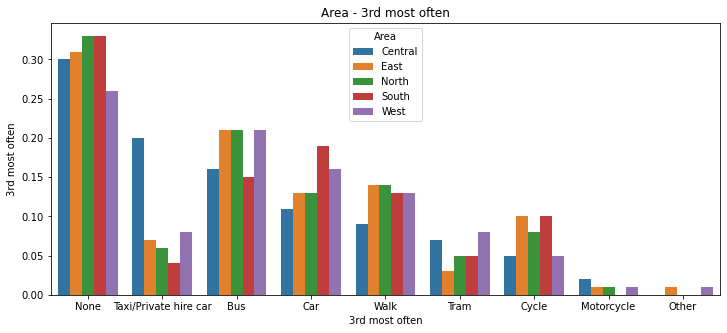

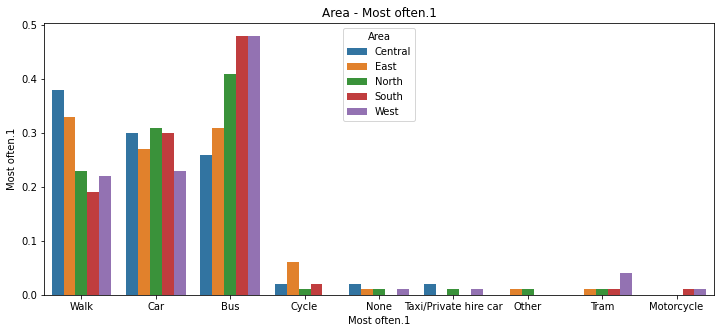

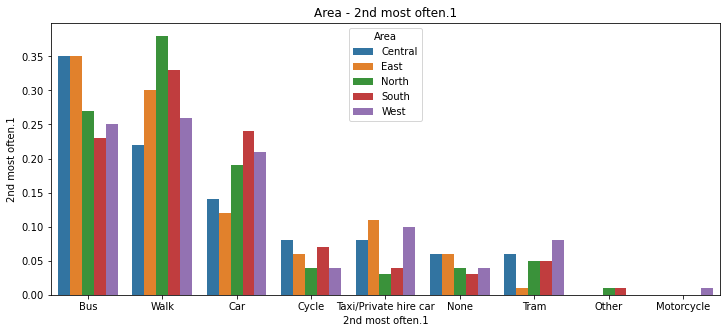

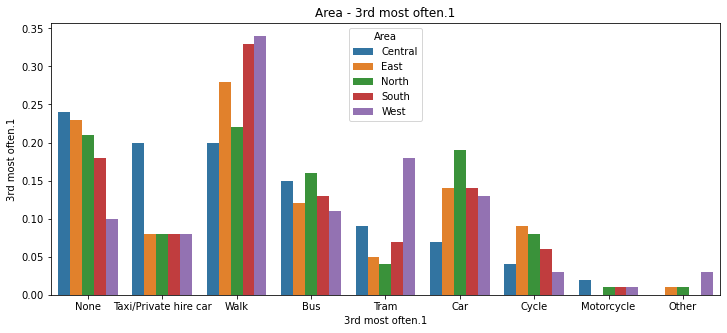

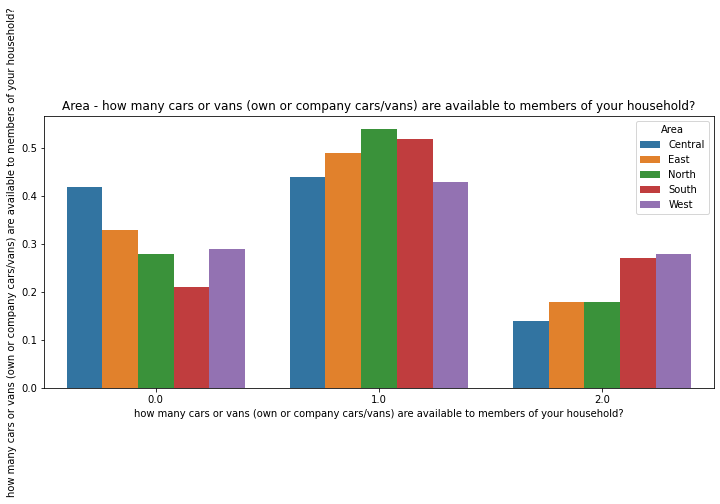

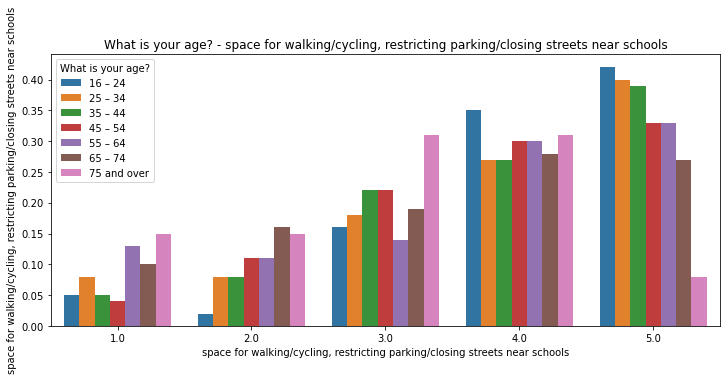

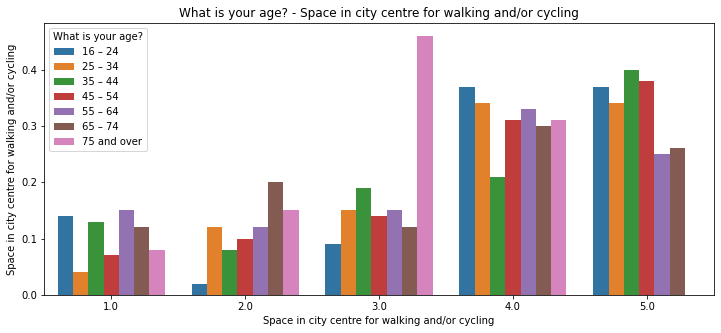

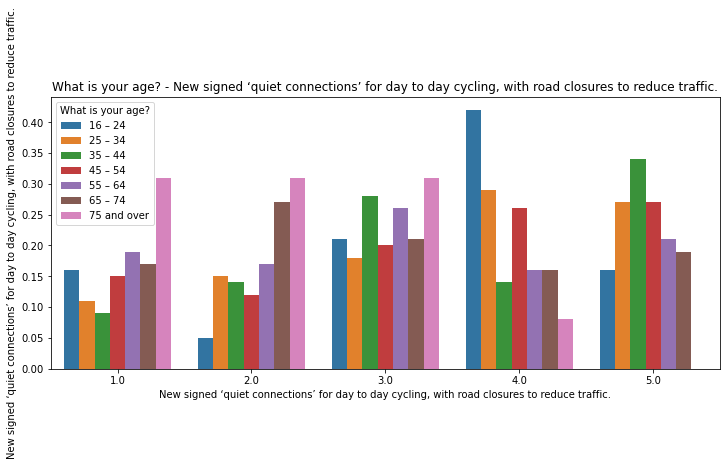

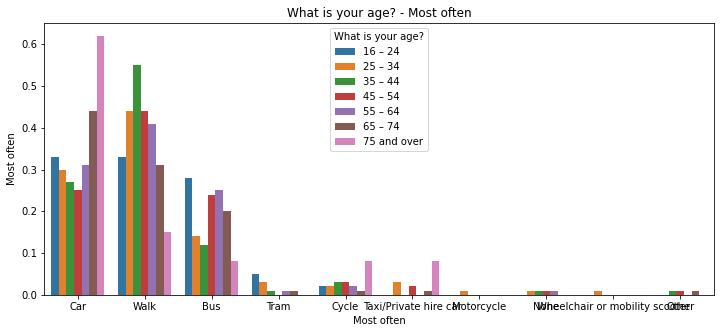

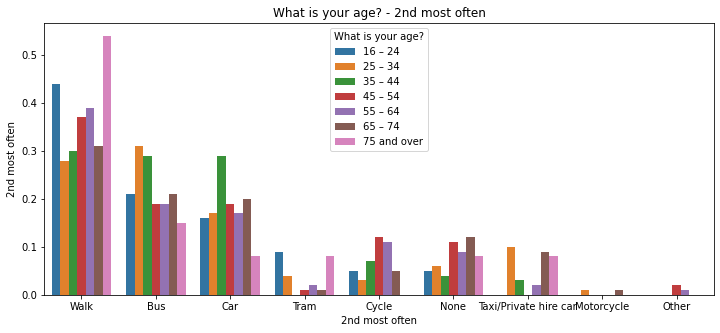

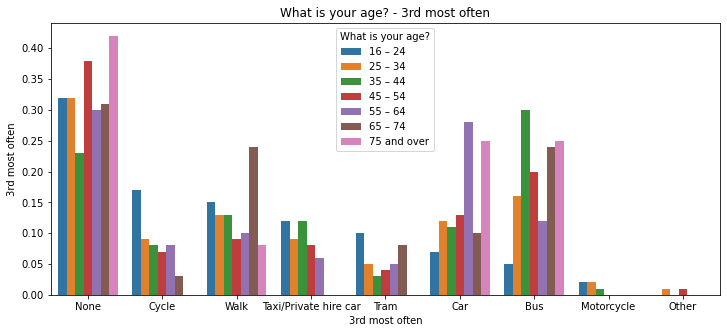

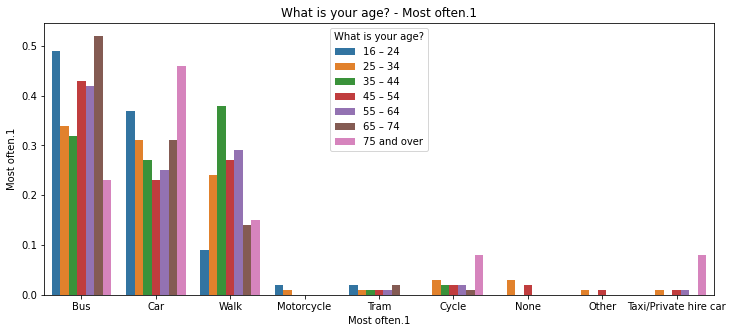

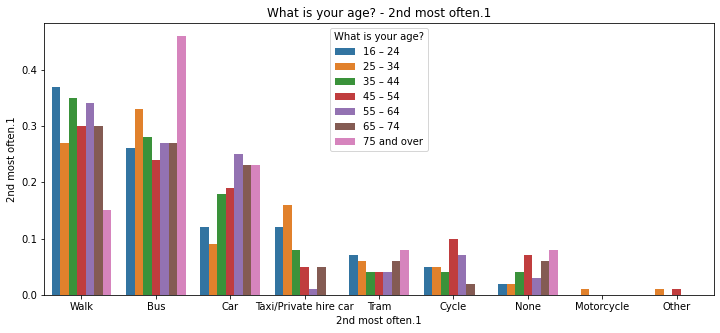

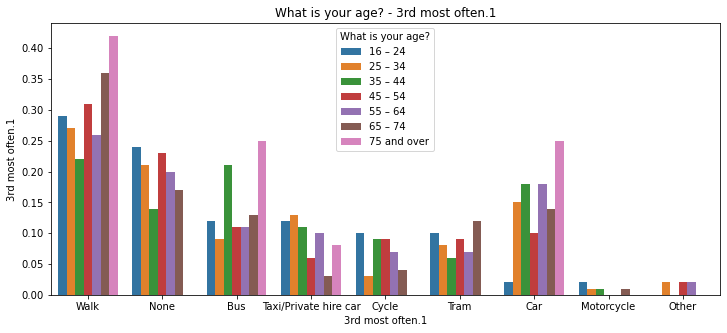

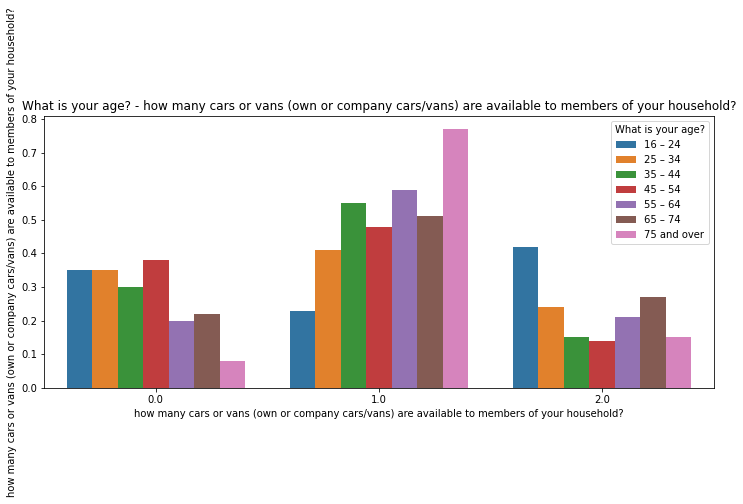

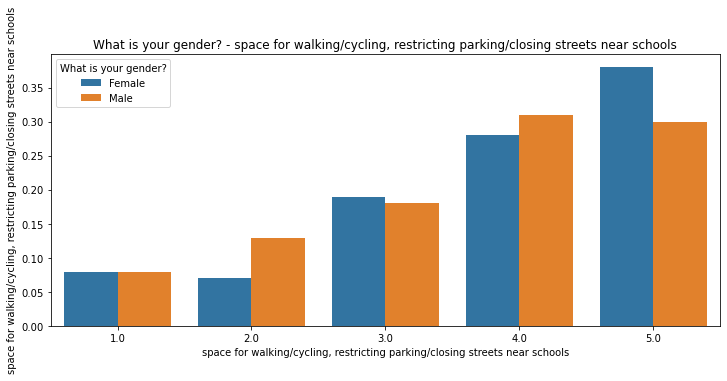

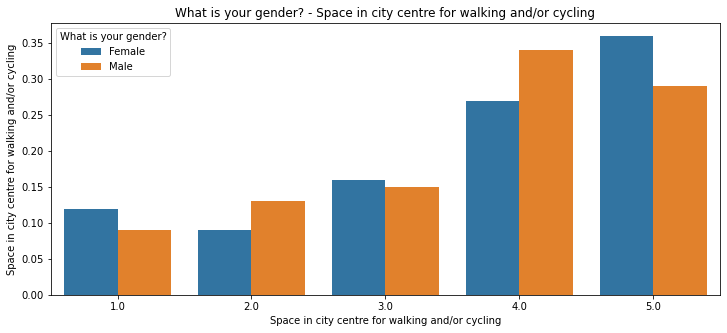

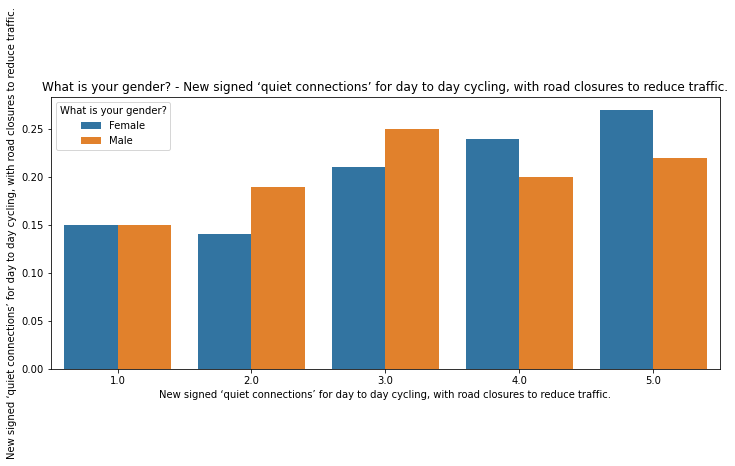

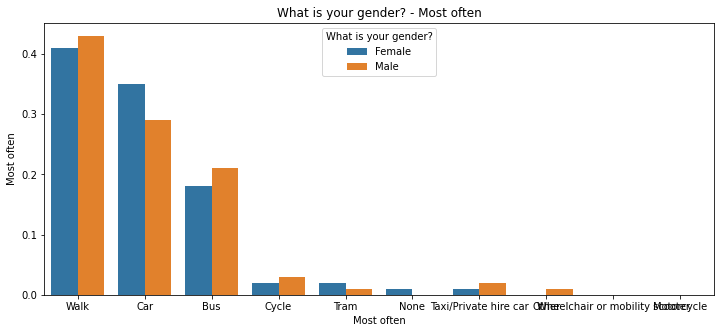

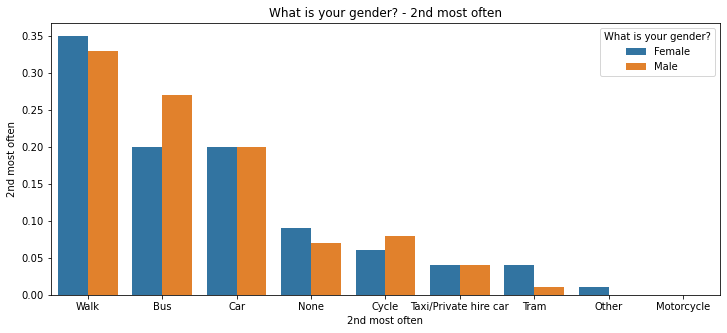

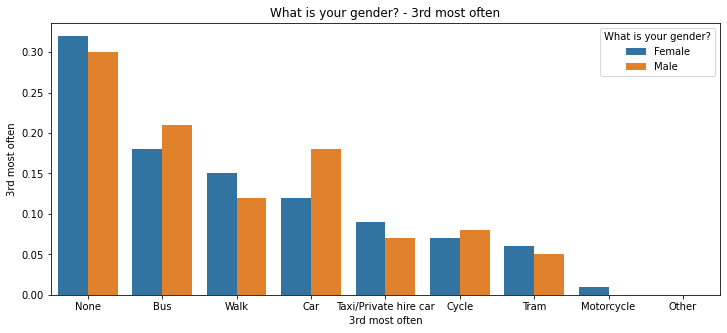

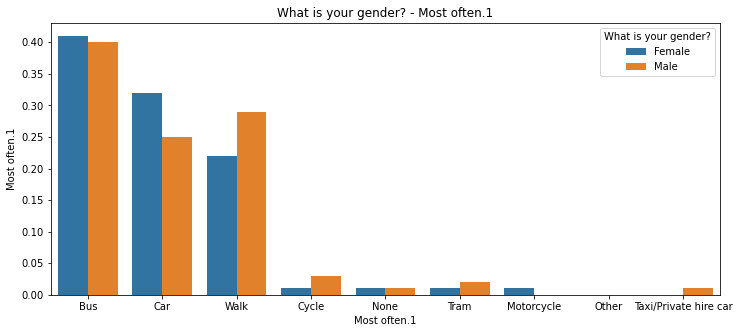

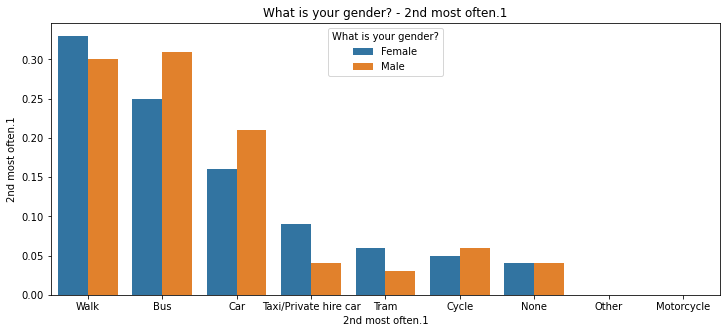

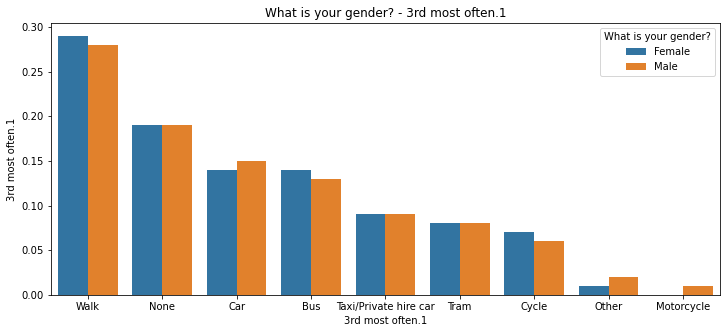

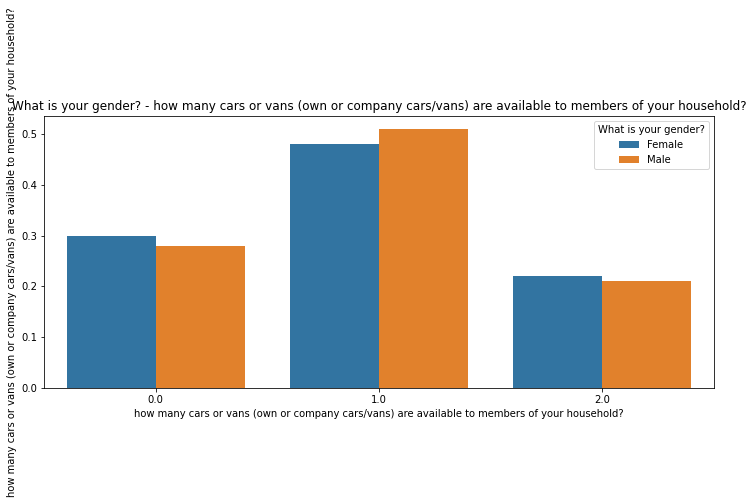

In [ ]:
for el in elements:
    for col in factors:
        new_df = norm_df.groupby(el)[col].value_counts(normalize=True).round(2).reset_index(level=[0])
        plt.figure(figsize=(12,5))
        sns.barplot(x=new_df.index, y=new_df.iloc[:,1], hue=new_df.iloc[:,0])
        plt.title(el + ' - ' + col)
        plt.show()

In [ ]:
norm_df.to_csv('MarketReseach_normalized_correlations_BLP.csv')

# Correlation between number of private vehicles in a household and opinion on space in city centre for walking and/or cycling
Correlation between continuous variables

In [ ]:
x = norm_df['how many cars or vans (own or company cars/vans) are available to members of your household?']
alpha = 0.05
statistically_significant = 0
pair_analised = 0

for el in elements:
    for val in norm_df[el].unique():
        for col in opinions:
            regression = linregress(x, norm_df[col])
            pair_analised += 1
            if regression.pvalue < alpha:
                statistically_significant += 1
                if (regression.rvalue > 0.3) or (regression.rvalue < -0.3):
                    print('The linear model between '+ col.upper() \
                      + ' and the number of private vehicles is statistically significant in ' + val.upper() \
                     + ', with a correlation value r of ' + str(round(regression.rvalue,2)) + '\n')

print('There are ' + str(statistically_significant) + ' statistically significant correlations among the ' \
      + str(pair_analised)+ ' analysed.')

There are 42 statistically significant correlations among the 42 analysed.


but none of the correlations analysed are strong

In [ ]:
for el in elements:
    for val in norm_df[el].unique():
        print(val)

North
East
South
West
Central
25 – 34
45 – 54
35 – 44
65 – 74
55 – 64
16 – 24
75 and over
Female
Male


## Considering each area
Calculate the t-test for the means of two independent sample sets: a continuous variable corresponding to different categorical values
* factor in the area
* factor in the rest of Edinburgh

This test assumes that the populations have identical variances by default.

H0: the means of the samples are equal
H1: the means of the samples are unequal

In [ ]:
for opinion in opinions:
    for area in norm_df.Area.unique():
        df_area = norm_df[norm_df.Area == area]
        df_rest = norm_df[norm_df.Area != area]
        ttest = ttest_ind(df_area[opinion], df_rest[opinion], equal_var=False)
        if ttest.pvalue <0.05:
            print(opinion + ' in ' + area + ' \nvs. the rest of the city of Edinburgh have a statistically different mean. ' \
                 + area + ' shows a support of ' + str(round(df_area[opinion].mean(),2)) + ', while the rest of the city, ' \
                  + str(round(df_rest[opinion].mean(),2)))

New signed ‘quiet connections’ for day to day cycling, with road closures to reduce traffic. in West 
vs. the rest of the city of Edinburgh have a statistically different mean. West shows a support of 2.89, while the rest of the city, 3.34


## Considering each age range
Calculate the t-test for the means of two independent sample sets: a continuous variable corresponding to different categorical values
* factor in the age range
* factor in the rest of the people

This test assumes that the populations have identical variances by default.

H0: the means of the samples are equal
H1: the means of the samples are unequal

In [ ]:
for opinion in opinions:
    for age in norm_df[elements[1]].unique():
        df_age = norm_df[norm_df[elements[1]] == age]
        df_rest = norm_df[norm_df[elements[1]] != age]
        ttest = ttest_ind(df_age[opinion], df_rest[opinion], equal_var=False)
        if ttest.pvalue <0.05:
            print(opinion + ' in ' + age + ' \nvs. the rest of the city of Edinburgh have a statistically different mean. ' \
                 + age + ' shows a support of ' + str(round(df_age[opinion].mean(),2)) + ', while the rest of the city, ' \
                  + str(round(df_rest[opinion].mean(),2)))

space for walking/cycling, restricting parking/closing streets near schools in 16 – 24 
vs. the rest of the city of Edinburgh have a statistically different mean. 16 – 24 shows a support of 4.07, while the rest of the city, 3.7
space for walking/cycling, restricting parking/closing streets near schools in 75 and over 
vs. the rest of the city of Edinburgh have a statistically different mean. 75 and over shows a support of 3.0, while the rest of the city, 3.75
Space in city centre for walking and/or cycling in 75 and over 
vs. the rest of the city of Edinburgh have a statistically different mean. 75 and over shows a support of 3.0, while the rest of the city, 3.64
New signed ‘quiet connections’ for day to day cycling, with road closures to reduce traffic. in 35 – 44 
vs. the rest of the city of Edinburgh have a statistically different mean. 35 – 44 shows a support of 3.49, while the rest of the city, 3.19
New signed ‘quiet connections’ for day to day cycling, with road closures to reduc

## Considering each gender
Calculate the t-test for the means of two independent sample sets: a continuous variable corresponding to different categorical values
* factor in females
* factor in males

This test assumes that the populations have identical variances by default.

H0: the means of the samples are equal
H1: the means of the samples are unequal

In [ ]:
for opinion in opinions:
    for g in norm_df[elements[2]].unique():
        df_g = norm_df[norm_df[elements[2]] == g]
        df_rest = norm_df[norm_df[elements[2]] != g]
        ttest = ttest_ind(df_g[opinion], df_rest[opinion], equal_var=False)
        if ttest.pvalue <0.05:
            print(opinion + ' in ' + g + ' \nvs. the rest of the city of Edinburgh have a statistically different mean. ' \
                 + g + ' shows a support of ' + str(round(df_g[opinion].mean(),2)) + ', while the rest of the city, ' \
                  + str(round(df_rest[opinion].mean(),2)))